***
<p style="text-align: center;">
    <img src="img/banner.png" alt="" style="vertical-align: middle;" />
</p>
<p style="text-align: center;">
    <img src="img/LOGO_SDGS_EYES_Color.png" alt="" style="vertical-align: middle;  width: 250px; height: auto;" />
</p>
        
<h1 style="text-align: center;"><span style="color: #22689B;"><strong>User uptake webinar: GHG Emissions from fire: Advancing on SDGs indicators monitoring, reporting and accounting</strong></span></h1>



<p>&nbsp;</p>
<h2 style="text-align: center;"><span style="color: #22689B;">Using Copernicus data to estimate GHG emissions from forest fires</span></h2>
<p>&nbsp;</p>


<h5 style="text-align: right;"><em>BEGINNER-INTERMEDIATE LEVEL</em></h5>
<hr />

_Author_: Chiara Aquino
<br>
_Date_: 30 January 2025

***

<a id="Table_of_Contents"></a>
<h1><span style="color: #22689B;"><strong>Table of Contents:</strong></span></h1>
<ol>
  <li><a href="#Sect1">Introduction</a></li>
  <li><a href="#Sect2">Estimating GHG emissions</a></li>
  <li><a href="#Sect3">Visualisation of GHGs over selected region</a></li>
  <li><a href="#Sect4">Visualization of GHGs timeseries over selected region</a></li>
  <li><a href="#Sect5">Save your data</a></li>  
</ol>

***
***

<a id="Sect1"></a>
<h1><span style="color: #22689B;"><strong>1. Introduction</strong></span></h1>
<a href="#Table_of_Contents">Go back to the "Table of Contents"</a>

Wildfires have a long list of socioeconomic impacts, including material and human losses, biodiversity loss, and the advancement of desertification, among others. In addition to these direct impacts, wildfires are also a significant source of pollutant emissions that severely affect air quality and thus public health. Among the main pollutants generated by wildfires are **carbon monoxide (CO)**, a toxic gas released in large quantities due to the incomplete combustion of biomass, and **nitrogen dioxide (NO₂)**, formed in the atmosphere from the reaction of compounds such as **nitric oxide (NO)** and **nitrogen monoxide (NO)**. Additionally, large amounts of **sulfur dioxide (SO₂)**, a gas that contributes to acid rain formation, and **carbon dioxide (CO₂)**, one of the main greenhouse gases, are emitted.

Wildfires also generate suspended particles, especially **fine particulate matter (PM2.5)**, which can penetrate deep into the lungs, causing respiratory problems, and reach the bloodstream, leading to various cardiovascular conditions. The combination of these pollutants creates a significant burden on ecosystems, the atmosphere, and exposed populations, especially in areas close to the fires or under the influence of air currents that carry these emissions.

In this tutorial, we will showcase a new platform that allow us to assess  emissions from wildfires in Italy

<p style="text-align: center;">
    <img src="img/platform.png" alt="" style="vertical-align: middle;" />
    <em><a href="http://51.158.73.145:5000/">Burnt area of the wildfires in Oristano, Sardinia region, 2021.</a></em></p>
</p>


### Used Datasets

The Copernicus Service offers a wide variety of environmental data that can be used for multiple purposes. The available products include observational data, remote sensing, modeling, ocean and climate indicators, etc. Each type of data has its own characteristics, such as spatial and temporal resolution, available variables (physical, chemical, biogeochemical), frequency of database updates, and more.

In this tutorial, 

This product provides high spatial and temporal coverage, allowing us to assess information across the entire study area.

<a id="Sect2"></a>
<h1><span style="color: #22689B;"><strong>2. Estimating GHG emissions</strong></span></h1>
<a href="#Table_of_Contents">Go back to the "Table of Contents"</a>

This script provides the functions used to calculate GHG emissions from forest fires. GHG emissions (CO₂ + NO₂ + CH<sub>4</sub>) are calculated using the IPCC equation (2006):

<p style="text-align: center;">
    <img src="img/equation.png" alt="" style="vertical-align: middle;" />
</p>


where: 
<br>
L<sub>fire</sub> = amount of GHGs released as a result of fire [kgton of GHG]; 
<br>
A = burnt area [ha], provided by EFFIS Burn data product 
<br>
M<sub>v</sub> = mass of available fuels, in [kg dry matter ha-1], provided by Corine Land Cover level IV crosslinked with INFC carbon pools
<br>
C<sub>f</sub> = combustion factor, portion of biomass combusted [dimensionless], derived from EFFIS Fire severity product and the biomass efficiency model calibrated for Italy (Aquino et al., 202X)
<br>
G<sub>ef</sub> = emission factor [g GHG kg–1] for each GHG compound, taken by the NEIVAv1.0 database 

**Reference**
<br>
- Intergovernamental Panel on Climate Change (IPCC), 2006. 2006 IPCC guidelines for national greenhouse gas inventories. _Institute for global environmental strategies, Hayama, Kanagawa, Japan_.

- Chiriaco, M.V., Perugini, L., Cimini, D., D’Amato, E., Valentini, R., Bovio, G., Corona, P. and Barbati, A., 2013. Comparison of approaches for reporting forest fire-related biomass loss and greenhouse gas emissions in southern Europe. _International Journal of Wildland Fire_, 22(6), pp.730-738.


### Set up

The first step to working with Python interpreters is usually to import all the necessary tools and libraries from the Jupyter Notebook ecosystem. The following cell compiles all the libraries that will be used during the tutorial:

**General Note**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>

In [1]:
# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')
import geopandas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%run -i ghgFunctions.py

#### **Select parameters and input data**

In [6]:
landcover="CLC18"

fire_id = None
country = "IT" 
region = "Calabria"
province = "Cosenza"
commune = None
language = "ENGLISH"
year = 2022
crs = "epsg:4326"

# SHAPEFILES
path_to_fire_severity_shapefile = "../../data/shapefiles/effis/Fire_severity/severity_"+str(year)+"_italy.shp"
path_to_effis_shapefile = '../../data/shapefiles/effis/BA/effis_10092024/effis_italy_fixed_4326_10092024.shp'
path_to_clc18_shapefile = "../../data/shapefiles/CORINE_LC18/CLC18_IVLIV_IT_FOREST_CLASSES_fixed.shp"

# TABLES
path_to_landcover_legend_table = "../../data/tables/FOREST_LANDCOVER_LEGEND.csv"
path_to_C_factor_table = "../../data/tables/FIRE_SEVERITY_C_FACTOR_EMPIRICAL_MODEL.csv"
path_to_forest_classes_table = "../../data/tables/FOREST_CLASSES_LOOKUP.csv"
path_to_combustion_factor_table = "../../data/tables/FIRE_SEVERITY_C_FACTOR_EMPIRICAL_MODEL.csv"
path_to_biomass_live_table = "../data/tables/INFC15_AGB_PER_REGION.csv"
path_to_biomass_dead_table = "../data/tables/INFC15_DRY_WEIGHT_TOTAL_DEAD_WOOD_PER_REGION.csv"
path_to_biomass_fwd_table = "../data/tables/INFC05_DRY_WEIGHT_FWD_PER_REGION.csv"
path_to_biomass_litter_table = "../data/tables/INFC05_ORGANIC_CARBON_LITTER_PER_REGION.csv"
path_to_emission_factors_table = "../data/tables/GHG_EMISSION_FACTORS_IPCC2006.csv"

# GEOGRAPHICAL BORDERS
path_to_country_shapefile = '../../data/shapefiles/borders/countries/Italy.shp'
path_to_regions_shapefile = '../../data/shapefiles/borders/regions/Reg01012023_WGS84.shp'
path_to_provinces_shapefile = '../../data/shapefiles/borders/provinces/ProvCM01012024_WGS84.shp'
path_to_communes_shapefile = '../../data/shapefiles/borders/communes/Com01012024_WGS84.shp'

#OUTPUTS 
path_to_shapefile_output = "../../outputs/tests/GHG_emissions_by_forest_type.shp"
path_total_output = "../../outputs/tests/ghg_emissions_total.csv"
path_by_forest_output = "../../outputs/tests/ghg_emissions_by_forest.csv"

<a id="Sect1"></a>
<h1><span style="color: #22689B;"><strong>3. Visualisation of GHGs over selected region</strong></span></h1>
<a href="#Table_of_Contents">Go back to the "Table of Contents"</a>

total fire events: 142


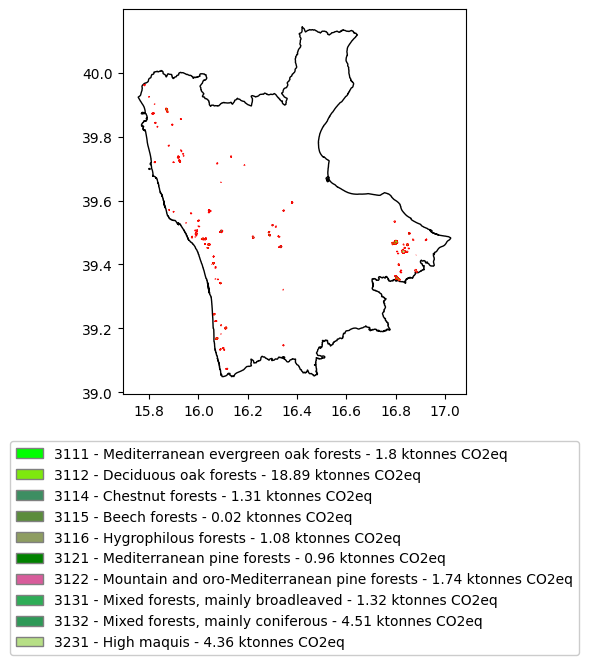

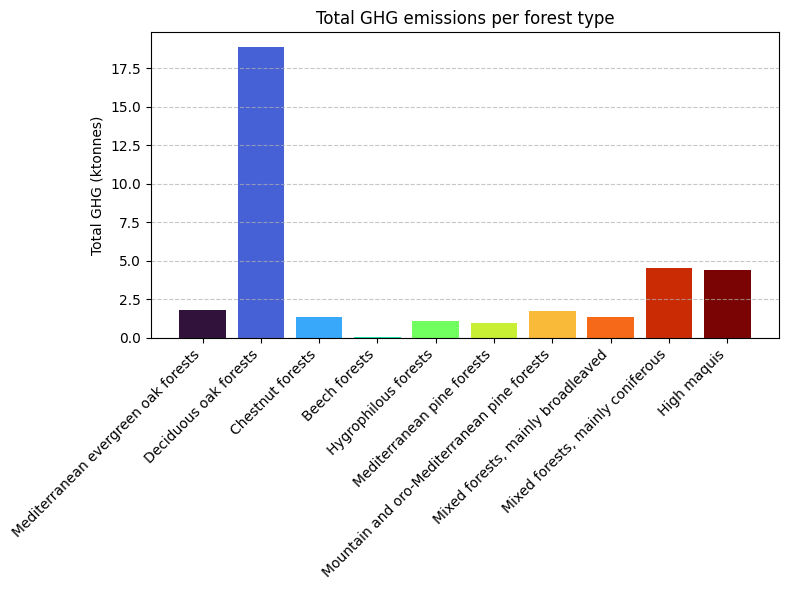


 total GHG emissions for the year 2022 in Calabria region in 36.0 +/- 0.04 ktonnes CO2eq


In [13]:
def main():
    warnings.filterwarnings('ignore')
    
    # Step 1: Import Data
    effis_ba = import_data(path_to_effis_shapefile, year, fire_id)
    burnt_shape, border_shape = crop_shapefile(path_to_country_shapefile,
                                path_to_regions_shapefile,
                                path_to_provinces_shapefile,
                                path_to_communes_shapefile,
                                effis_ba,
                                country=country,
                                region=region,
                                province=province,
                                commune=commune)

    tot_events = len(burnt_shape)
    print("total fire events:", len(burnt_shape))


     # Get the appropriate category for the region
    category = get_category(region)
    
    # Step 2: Get Landcover Classes
    path_to_clc18_shapefile = f"../../data/shapefiles/CORINE_LC18/CLC18_IVLIV_IT_FOREST_CLASSES_fixed{category}.shp"
    
    forest_classes, forest_labels, forest_colors = get_landcover_classes(landcover,path_to_landcover_legend_table,language)
        # get landcover class within burnt area
    forest_in_burnt_area = intersect_vectors(path_to_clc18_shapefile, burnt_shape, crs)
    
    # Step 3: Calculate Total Burnt Area
    path_to_fire_severity_shapefile = f"../../data/shapefiles/effis/Fire_severity/severity_{year}_italy{category}.shp"
    
    AC = get_combustion_factor(path_to_fire_severity_shapefile, forest_in_burnt_area, 
                          path_to_forest_classes_table, path_to_C_factor_table, landcover, crs,
                              language)
    
    #Step 4: Calculate biomass
    B = get_biomass(path_to_forest_classes_table,path_to_biomass_live_table, 
                    path_to_biomass_dead_table, path_to_biomass_fwd_table, path_to_biomass_litter_table, 
                    landcover, region)

    # Step 5. Get combustion factor (C) for each vegetation type
    D = get_emission_factors(path_to_emission_factors_table)
        
    # Step 7. Calculate total GHG emissions from emission factors
    ghg_total, ghg_total_std, df_ghg_all_fires = get_total_ghg_emissions(AC,B,D,landcover)

    #plot 
    results=plot_map(forest_classes, forest_labels, forest_colors, border_shape,
                                        language,burnt_shape,df_ghg_all_fires,crs,
                                        path_to_shapefile_output=None,plot_border=True)

    plot_barplot(results)

    #ghg_all_fires_shp = get_info_each_fire_event(df_ghg_all_fires)

     #save results
    data = save_total_ghg_emissions(ghg_total, ghg_total_std, df_ghg_all_fires, year, country, region, province, commune, tot_events)
    data_by_forest = save_total_ghg_emissions_by_forest_type(df_ghg_all_fires, year, country, region, province, commune, tot_events, landcover, language)
    
    # Return results if needed
    return ghg_total, ghg_total_std, df_ghg_all_fires, data, data_by_forest

if __name__ == "__main__":
    ghg_total, ghg_total_std, df_ghg_all_fires, data, data_by_forest = main()

#check Total GHG per year
print("\n total GHG emissions for the year " + str(year)  +" in " + str(region) +" region in "
      + str(np.round(ghg_total,2))+ " +/- " + str(np.round(ghg_total_std,2))+ " ktonnes CO2eq")



<a id="Sect4"></a>
<h1><span style="color: #22689B;"><strong>4. Visualisation of GHGs timeseries over selected region</strong></span></h1>
<a href="#Table_of_Contents">Go back to the "Table of Contents"</a>

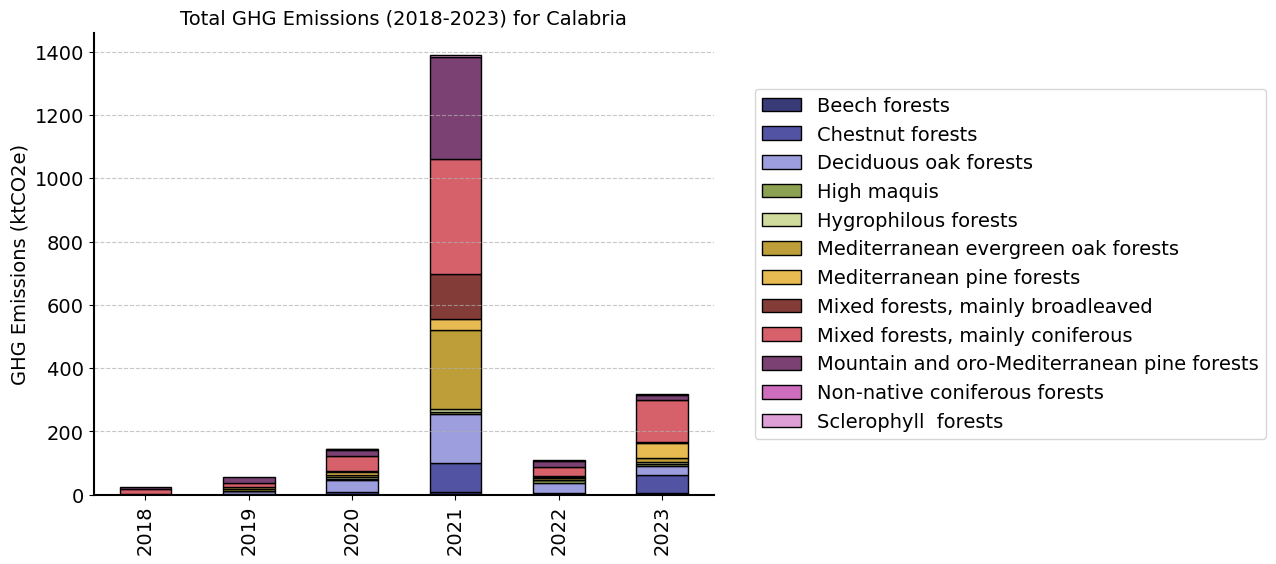

In [90]:
# Filter the data based on the region
df = pd.read_csv('../../data/tables/emission_database/ghg_emissions_Italian_regions_2018_2023_by_forest.csv')
plot_stacked(df,region)


<a id="Sect5"></a>
<h1><span style="color: #22689B;"><strong>5. Save data</strong></span></h1>
<a href="#Table_of_Contents">Go back to the "Table of Contents"</a>

In [ ]:
### Save data

all_data.append(data)
all_data_by_forest.extend(data_by_forest)

# Convert the results to a DataFrame
df_results = pd.DataFrame(all_data)
df_results_by_forest = pd.DataFrame(all_data_by_forest)

#save dataframes
df_results.to_csv(path_total_output, index=False)
df_results_by_forest.to_csv(path_by_forest_output, index=False)

#save shapefile
ghg_all_fires_shp.to_file(path_to_shapefile_output)